# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

23:05:59 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=217838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=342186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=662203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=220243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=492724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=872027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

23:06:01 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=668703;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=488353;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

23:06:02 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=326016;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=226710;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

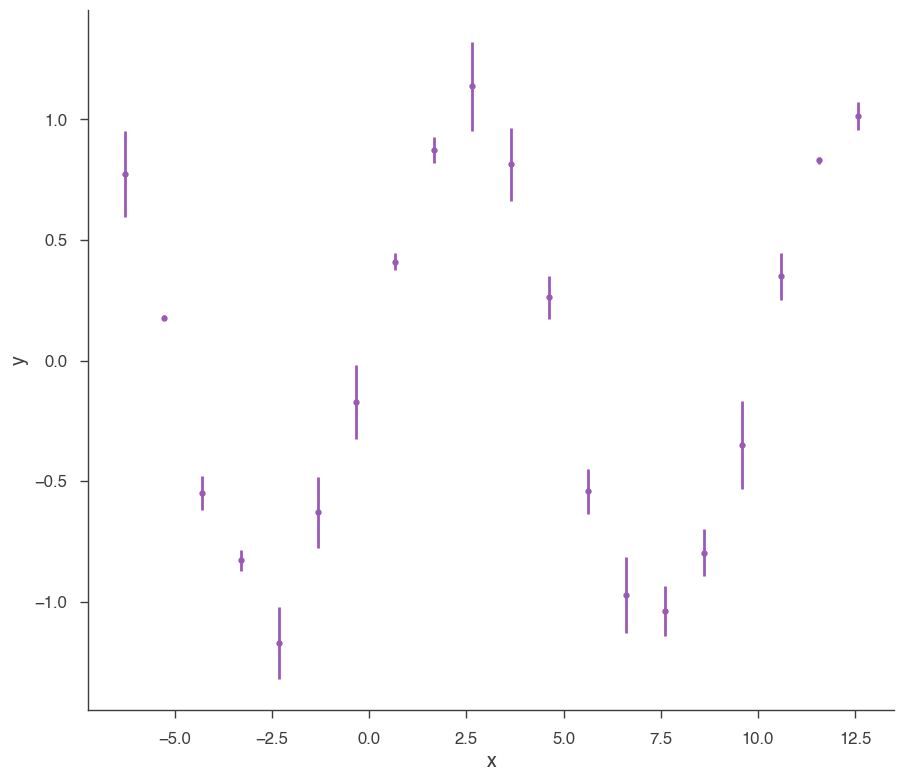

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=640914;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=61509;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

23:06:05 INFO      Mean acceptance fraction: 0.71                                              ]8;id=927508;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=900516;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=92824;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=400567;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=9590;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=247628;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 -0.019 +0.018,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.975 -0.033 +0.035) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.522519
total,-5.522519


Values of statistical measures:

,statistical measures
AIC,15.750920
BIC,17.036502
DIC,15.231936
PDIC,2.088878


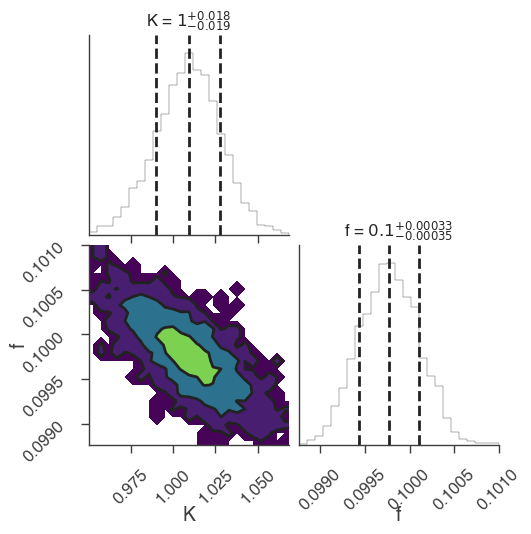

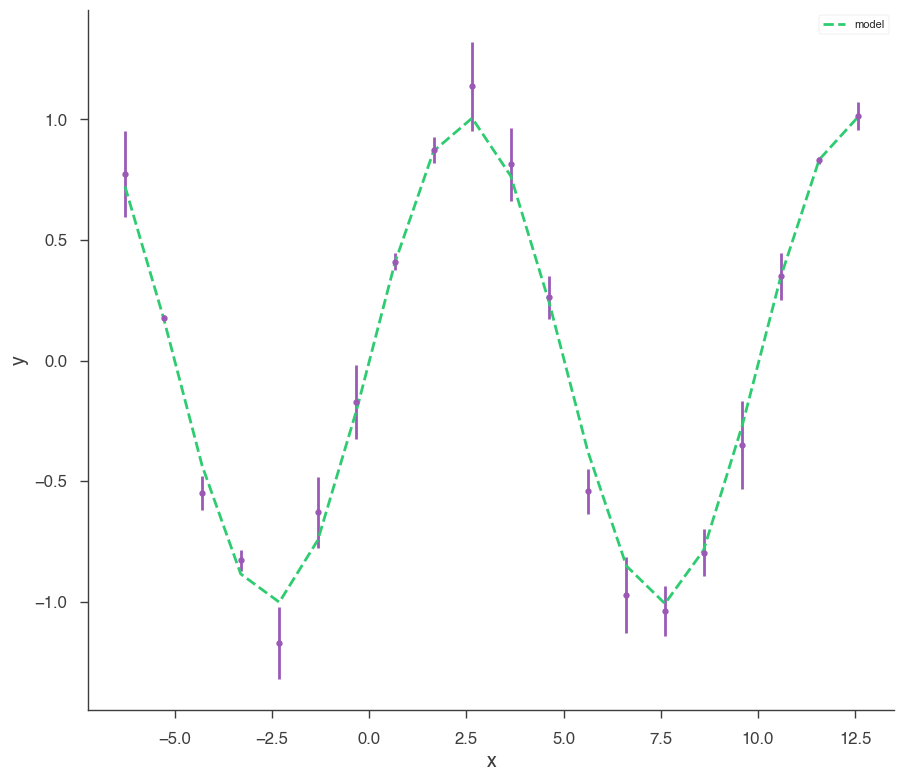

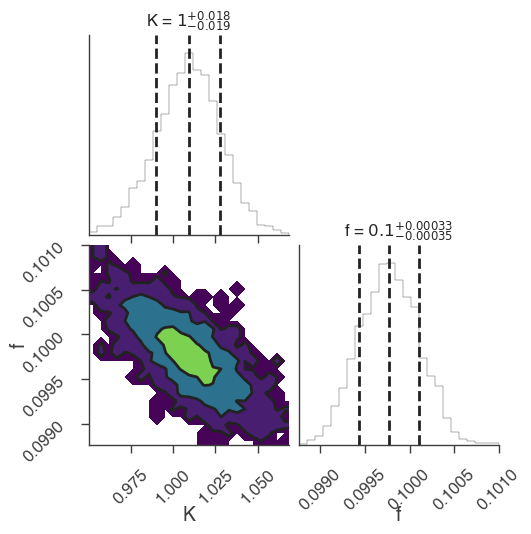

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

23:06:06 INFO      sampler set to multinest                                                ]8;id=441026;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=85580;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -15.375144805135784      +/-  0.14882660859588259     
 Total Likelihood Evaluations:         5959
 Sampling finished. Exiting MultiNest



23:06:07 INFO      fit restored to maximum of posterior                                         ]8;id=281188;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=955615;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=192147;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=738302;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.010 -0.018 +0.019,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.976 -0.029 +0.034) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.524382
total,-5.524382


Values of statistical measures:

,statistical measures
AIC,15.754647
BIC,17.040229
DIC,15.036216
PDIC,1.989327
log(Z),-6.677341


         INFO      deleting the chain directory chains                                     ]8;id=933149;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=133110;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

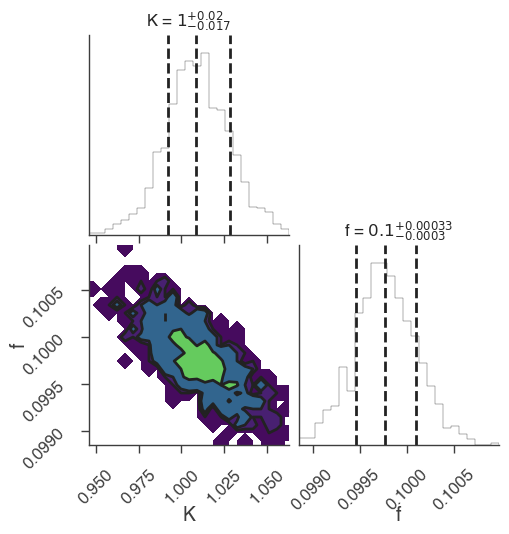

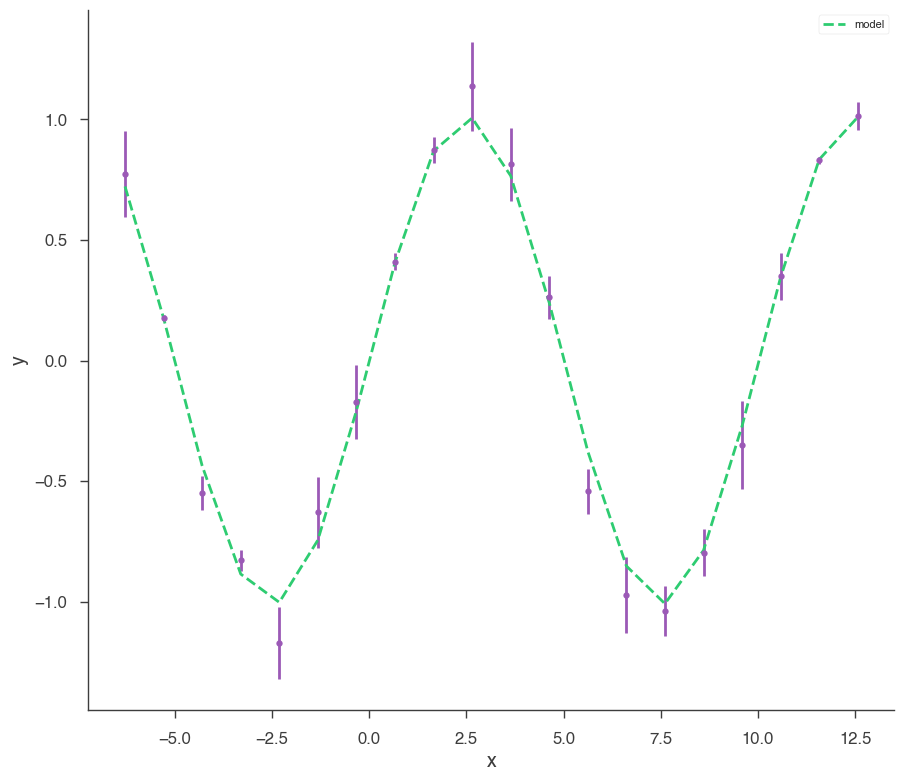

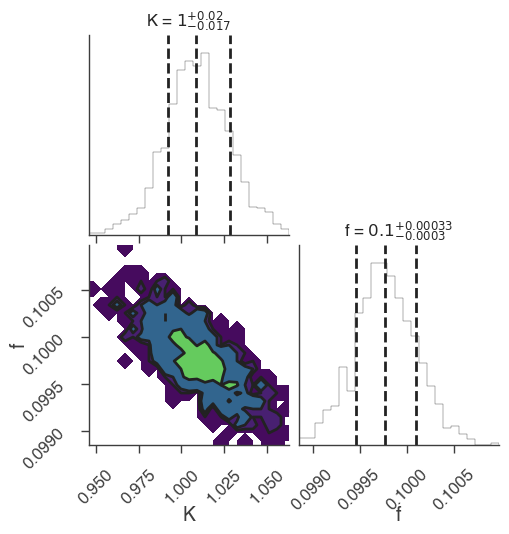

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

23:06:08 INFO      sampler set to dynesty_nested                                           ]8;id=222837;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=886900;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

236it [00:00, 2357.62it/s, bound: 0 | nc: 1 | ncall: 736 | eff(%): 32.065 | loglstar:   -inf < -6356.742 <    inf | logz: -6362.906 +/-  0.121 | dlogz: 6350.829 >  0.409]

472it [00:00, 1951.76it/s, bound: 0 | nc: 1 | ncall: 1258 | eff(%): 37.520 | loglstar:   -inf < -3120.993 <    inf | logz: -3128.843 +/-  0.139 | dlogz: 3120.577 >  0.409]

672it [00:00, 1672.21it/s, bound: 0 | nc: 6 | ncall: 1925 | eff(%): 34.909 | loglstar:   -inf < -2128.973 <    inf | logz: -2136.710 +/-  0.135 | dlogz: 2124.339 >  0.409]

844it [00:00, 1203.25it/s, bound: 0 | nc: 3 | ncall: 2976 | eff(%): 28.360 | loglstar:   -inf < -1688.719 <    inf | logz: -1697.423 +/-  0.145 | dlogz: 1689.852 >  0.409]

979it [00:00, 986.30it/s, bound: 0 | nc: 4 | ncall: 4340 | eff(%): 22.558 | loglstar:   -inf < -1394.312 <    inf | logz: -1403.330 +/-  0.147 | dlogz: 1397.694 >  0.409] 

1090it [00:00, 859.27it/s, bound: 0 | nc: 24 | ncall: 5783 | eff(%): 18.848 | loglstar:   -inf < -1281.860 <    inf | logz: -1289.826 +/-  0.136 | dlogz: 1282.110 >  0.409]

1184it [00:01, 699.81it/s, bound: 0 | nc: 38 | ncall: 7468 | eff(%): 15.854 | loglstar:   -inf < -1211.373 <    inf | logz: -1219.688 +/-  0.135 | dlogz: 1211.639 >  0.409]

1262it [00:01, 627.88it/s, bound: 0 | nc: 11 | ncall: 8719 | eff(%): 14.474 | loglstar:   -inf < -1168.572 <    inf | logz: -1176.678 +/-  0.135 | dlogz: 1168.326 >  0.409]

1330it [00:01, 492.76it/s, bound: 0 | nc: 8 | ncall: 10523 | eff(%): 12.639 | loglstar:   -inf < -904.500 <    inf | logz: -914.491 +/-  0.157 | dlogz: 910.503 >  0.409]   

1385it [00:01, 399.20it/s, bound: 0 | nc: 61 | ncall: 12411 | eff(%): 11.159 | loglstar:   -inf < -745.412 <    inf | logz: -755.552 +/-  0.159 | dlogz: 753.029 >  0.409]

1430it [00:02, 352.63it/s, bound: 0 | nc: 16 | ncall: 14075 | eff(%): 10.160 | loglstar:   -inf < -627.064 <    inf | logz: -637.122 +/-  0.155 | dlogz: 630.335 >  0.409]

1469it [00:02, 311.34it/s, bound: 1 | nc: 1 | ncall: 14458 | eff(%): 10.160 | loglstar:   -inf < -559.755 <    inf | logz: -569.666 +/-  0.152 | dlogz: 561.889 >  0.409] 

1651it [00:02, 575.68it/s, bound: 1 | nc: 7 | ncall: 14789 | eff(%): 11.164 | loglstar:   -inf < -336.158 <    inf | logz: -345.567 +/-  0.148 | dlogz: 336.426 >  0.409]

1737it [00:02, 544.44it/s, bound: 2 | nc: 1 | ncall: 15032 | eff(%): 11.555 | loglstar:   -inf < -263.562 <    inf | logz: -273.084 +/-  0.150 | dlogz: 263.659 >  0.409]

1936it [00:02, 830.11it/s, bound: 2 | nc: 2 | ncall: 15369 | eff(%): 12.597 | loglstar:   -inf < -164.311 <    inf | logz: -173.969 +/-  0.148 | dlogz: 163.874 >  0.409]

2044it [00:02, 711.96it/s, bound: 3 | nc: 1 | ncall: 15660 | eff(%): 13.052 | loglstar:   -inf < -123.028 <    inf | logz: -133.342 +/-  0.149 | dlogz: 123.011 >  0.409]

2238it [00:02, 958.27it/s, bound: 3 | nc: 4 | ncall: 15997 | eff(%): 13.990 | loglstar:   -inf < -75.621 <    inf | logz: -85.275 +/-  0.148 | dlogz: 74.264 >  0.409]   

2360it [00:03, 858.19it/s, bound: 4 | nc: 1 | ncall: 16276 | eff(%): 14.500 | loglstar:   -inf < -55.956 <    inf | logz: -65.339 +/-  0.147 | dlogz: 53.958 >  0.409]

2545it [00:03, 1067.05it/s, bound: 4 | nc: 7 | ncall: 16577 | eff(%): 15.353 | loglstar:   -inf < -37.639 <    inf | logz: -47.567 +/-  0.150 | dlogz: 35.788 >  0.409]

2674it [00:03, 946.85it/s, bound: 5 | nc: 1 | ncall: 16847 | eff(%): 15.872 | loglstar:   -inf < -29.676 <    inf | logz: -39.402 +/-  0.147 | dlogz: 27.262 >  0.409] 

2885it [00:03, 1201.28it/s, bound: 5 | nc: 1 | ncall: 17158 | eff(%): 16.814 | loglstar:   -inf < -20.388 <    inf | logz: -30.232 +/-  0.148 | dlogz: 17.548 >  0.409]

3027it [00:03, 1012.63it/s, bound: 6 | nc: 1 | ncall: 17462 | eff(%): 17.335 | loglstar:   -inf < -16.045 <    inf | logz: -25.921 +/-  0.149 | dlogz: 12.872 >  0.409]

3213it [00:03, 1193.70it/s, bound: 6 | nc: 8 | ncall: 17766 | eff(%): 18.085 | loglstar:   -inf < -11.626 <    inf | logz: -21.702 +/-  0.150 | dlogz:  8.184 >  0.409]

3353it [00:04, 994.14it/s, bound: 7 | nc: 1 | ncall: 18089 | eff(%): 18.536 | loglstar:   -inf < -9.975 <    inf | logz: -19.830 +/-  0.149 | dlogz:  5.957 >  0.409]  

3548it [00:04, 1196.24it/s, bound: 7 | nc: 1 | ncall: 18370 | eff(%): 19.314 | loglstar:   -inf < -8.272 <    inf | logz: -18.145 +/-  0.149 | dlogz:  3.802 >  0.409]

3690it [00:04, 1060.42it/s, bound: 8 | nc: 1 | ncall: 18672 | eff(%): 19.762 | loglstar:   -inf < -7.457 <    inf | logz: -17.333 +/-  0.149 | dlogz:  2.681 >  0.409]

3908it [00:04, 1305.71it/s, bound: 8 | nc: 2 | ncall: 19021 | eff(%): 20.546 | loglstar:   -inf < -6.516 <    inf | logz: -16.473 +/-  0.149 | dlogz:  1.467 >  0.409]

4060it [00:04, 1168.53it/s, bound: 9 | nc: 1 | ncall: 19321 | eff(%): 21.013 | loglstar:   -inf < -6.187 <    inf | logz: -16.094 +/-  0.149 | dlogz:  0.942 >  0.409]

4269it [00:04, 1376.10it/s, bound: 9 | nc: 2 | ncall: 19659 | eff(%): 21.715 | loglstar:   -inf < -5.901 <    inf | logz: -15.778 +/-  0.149 | dlogz:  0.517 >  0.409]

4351it [00:04, 910.44it/s, +400 | bound: 9 | nc: 1 | ncall: 20244 | eff(%): 23.942 | loglstar:   -inf < -5.514 <    inf | logz: -15.333 +/-  0.148 | dlogz:  0.001 >  0.409]

23:06:13 INFO      fit restored to maximum of posterior                                         ]8;id=932847;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=654481;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=334628;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=315114;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 -0.017 +0.018,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.975 -0.030 +0.032) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.522699
total,-5.522699


Values of statistical measures:

,statistical measures
AIC,15.751280
BIC,17.036863
DIC,14.768249
PDIC,1.861128
log(Z),-6.658910


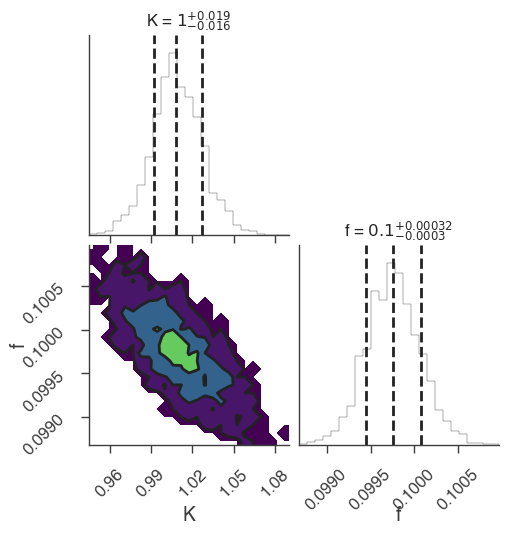

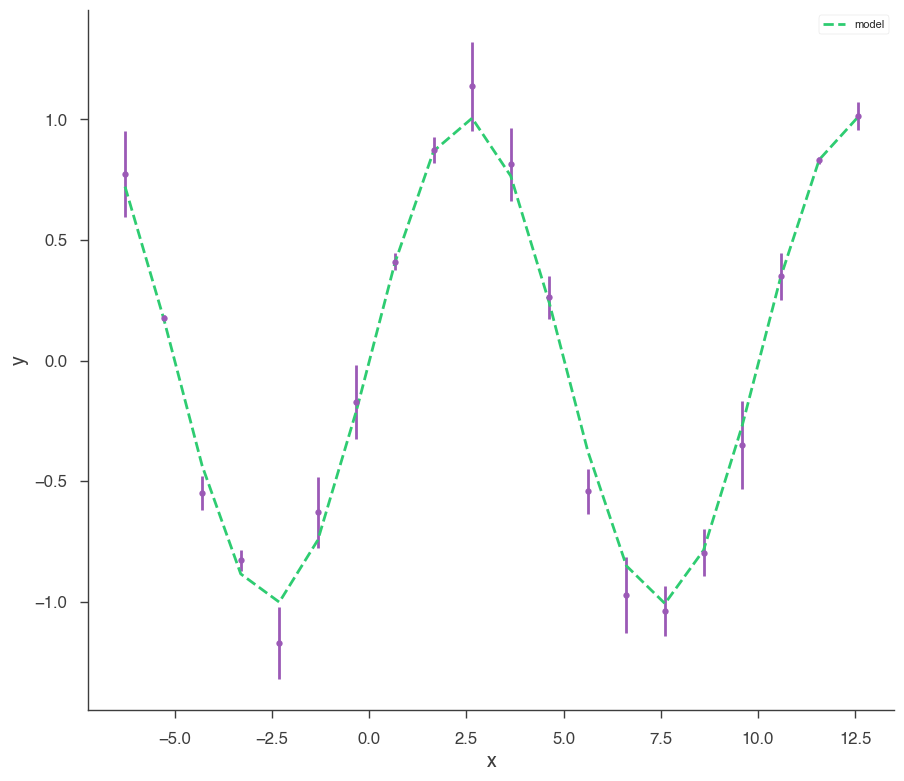

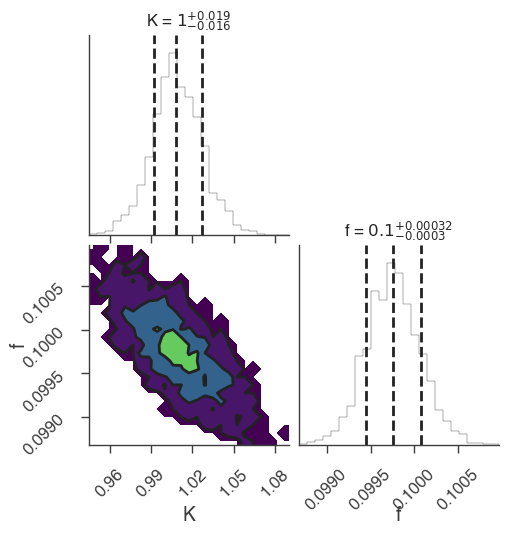

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

23:06:14 INFO      sampler set to dynesty_dynamic                                          ]8;id=357705;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=448708;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

98it [00:00, 979.22it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 108 | eff(%): 16.118 | loglstar:   -inf < -11341.205 <    inf | logz: -11348.309 +/-  0.119 | dlogz: 11341.417 >  0.010]

301it [00:00, 1595.02it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 414 | eff(%): 32.932 | loglstar:   -inf < -5736.657 <    inf | logz: -5744.164 +/-  0.122 | dlogz: 5727.001 >  0.010] 

472it [00:00, 1645.56it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 782 | eff(%): 36.817 | loglstar:   -inf < -3698.111 <    inf | logz: -3705.925 +/-  0.124 | dlogz: 3685.702 >  0.010]

637it [00:00, 1464.83it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1283 | eff(%): 35.726 | loglstar:   -inf < -2602.809 <    inf | logz: -2610.465 +/-  0.119 | dlogz: 2587.430 >  0.010]

787it [00:00, 1282.18it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1926 | eff(%): 32.440 | loglstar:   -inf < -2156.262 <    inf | logz: -2164.616 +/-  0.126 | dlogz: 2157.672 >  0.010]

920it [00:00, 1097.70it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 2685 | eff(%): 28.885 | loglstar:   -inf < -1870.026 <    inf | logz: -1877.871 +/-  0.122 | dlogz: 1869.231 >  0.010]

1036it [00:00, 960.08it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 3512 | eff(%): 25.823 | loglstar:   -inf < -1656.038 <    inf | logz: -1663.982 +/-  0.123 | dlogz: 1654.888 >  0.010]

1138it [00:01, 808.23it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4546 | eff(%): 22.553 | loglstar:   -inf < -1460.658 <    inf | logz: -1469.169 +/-  0.125 | dlogz: 1460.141 >  0.010] 

1225it [00:01, 710.29it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 5415 | eff(%): 20.710 | loglstar:   -inf < -1357.642 <    inf | logz: -1366.712 +/-  0.129 | dlogz: 1358.007 >  0.010]

1301it [00:01, 597.85it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 6430 | eff(%): 18.773 | loglstar:   -inf < -1303.456 <    inf | logz: -1312.266 +/-  0.127 | dlogz: 1302.938 >  0.010]

1366it [00:01, 525.80it/s, batch: 0 | bound: 0 | nc: 48 | ncall: 7393 | eff(%): 17.306 | loglstar:   -inf < -1262.736 <    inf | logz: -1270.495 +/-  0.122 | dlogz: 1260.150 >  0.010]

1422it [00:01, 474.05it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 8292 | eff(%): 16.174 | loglstar:   -inf < -1226.054 <    inf | logz: -1233.921 +/-  0.122 | dlogz: 1223.824 >  0.010]

1472it [00:01, 419.08it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 9298 | eff(%): 15.023 | loglstar:   -inf < -1197.312 <    inf | logz: -1205.576 +/-  0.123 | dlogz: 1195.448 >  0.010]

1516it [00:02, 391.64it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 10310 | eff(%): 14.024 | loglstar:   -inf < -1176.231 <    inf | logz: -1184.117 +/-  0.122 | dlogz: 1173.771 >  0.010]

1556it [00:02, 363.95it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 11527 | eff(%): 12.938 | loglstar:   -inf < -1037.513 <    inf | logz: -1046.842 +/-  0.134 | dlogz: 1037.727 >  0.010]

1593it [00:02, 337.45it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 12470 | eff(%): 12.282 | loglstar:   -inf < -924.084 <    inf | logz: -933.328 +/-  0.129 | dlogz: 923.510 >  0.010]   

1627it [00:02, 300.07it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 13448 | eff(%): 11.665 | loglstar:   -inf < -826.361 <    inf | logz: -835.526 +/-  0.131 | dlogz: 825.797 >  0.010]

1658it [00:02, 271.71it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 14385 | eff(%): 11.139 | loglstar:   -inf < -772.636 <    inf | logz: -781.845 +/-  0.132 | dlogz: 772.139 >  0.010]

1686it [00:02, 249.84it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 15136 | eff(%): 10.783 | loglstar:   -inf < -700.619 <    inf | logz: -710.466 +/-  0.136 | dlogz: 701.285 >  0.010]

1711it [00:02, 239.23it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 15964 | eff(%): 10.392 | loglstar:   -inf < -650.010 <    inf | logz: -660.117 +/-  0.137 | dlogz: 651.173 >  0.010] 

1735it [00:03, 178.78it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16862 | eff(%):  9.993 | loglstar:   -inf < -622.088 <    inf | logz: -631.733 +/-  0.135 | dlogz: 622.109 >  0.010]

1945it [00:03, 562.07it/s, batch: 0 | bound: 1 | nc: 8 | ncall: 17192 | eff(%): 10.994 | loglstar:   -inf < -386.469 <    inf | logz: -396.070 +/-  0.132 | dlogz: 385.478 >  0.010]

2103it [00:03, 787.26it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17555 | eff(%): 11.648 | loglstar:   -inf < -272.100 <    inf | logz: -281.577 +/-  0.131 | dlogz: 270.347 >  0.010]

2204it [00:03, 709.87it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 17729 | eff(%): 12.091 | loglstar:   -inf < -222.203 <    inf | logz: -231.720 +/-  0.131 | dlogz: 221.889 >  0.010]

2384it [00:03, 952.60it/s, batch: 0 | bound: 2 | nc: 5 | ncall: 18081 | eff(%): 12.830 | loglstar:   -inf < -164.595 <    inf | logz: -174.246 +/-  0.134 | dlogz: 163.937 >  0.010]

2506it [00:03, 785.08it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18365 | eff(%): 13.284 | loglstar:   -inf < -136.871 <    inf | logz: -146.434 +/-  0.133 | dlogz: 135.819 >  0.010]

2705it [00:03, 1038.60it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18659 | eff(%): 14.119 | loglstar:   -inf < -94.331 <    inf | logz: -104.086 +/-  0.133 | dlogz: 93.027 >  0.010] 

2851it [00:04, 1132.73it/s, batch: 0 | bound: 3 | nc: 7 | ncall: 18969 | eff(%): 14.644 | loglstar:   -inf < -73.477 <    inf | logz: -83.429 +/-  0.133 | dlogz: 72.059 >  0.010] 

2984it [00:04, 900.35it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19203 | eff(%): 15.145 | loglstar:   -inf < -57.186 <    inf | logz: -67.104 +/-  0.133 | dlogz: 55.524 >  0.010] 

3203it [00:04, 1174.09it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19576 | eff(%): 15.954 | loglstar:   -inf < -38.559 <    inf | logz: -48.408 +/-  0.133 | dlogz: 36.346 >  0.010]

3346it [00:04, 955.69it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 19884 | eff(%): 16.415 | loglstar:   -inf < -31.182 <    inf | logz: -41.050 +/-  0.133 | dlogz: 28.688 >  0.010] 

3542it [00:04, 1161.09it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20170 | eff(%): 17.136 | loglstar:   -inf < -22.788 <    inf | logz: -32.767 +/-  0.133 | dlogz: 20.184 >  0.010]

3688it [00:04, 1227.01it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20509 | eff(%): 17.554 | loglstar:   -inf < -18.962 <    inf | logz: -28.786 +/-  0.133 | dlogz: 15.901 >  0.010]

3831it [00:05, 934.37it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 20727 | eff(%): 18.048 | loglstar:   -inf < -15.565 <    inf | logz: -25.532 +/-  0.134 | dlogz: 12.366 >  0.010] 

4018it [00:05, 1123.51it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21031 | eff(%): 18.661 | loglstar:   -inf < -12.626 <    inf | logz: -22.474 +/-  0.134 | dlogz:  8.944 >  0.010]

4169it [00:05, 1210.19it/s, batch: 0 | bound: 6 | nc: 6 | ncall: 21356 | eff(%): 19.075 | loglstar:   -inf < -10.846 <    inf | logz: -20.658 +/-  0.134 | dlogz:  6.824 >  0.010]

4311it [00:05, 983.98it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21528 | eff(%): 19.571 | loglstar:   -inf < -9.721 <    inf | logz: -19.584 +/-  0.133 | dlogz:  5.467 >  0.010]  

4502it [00:05, 1180.76it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21845 | eff(%): 20.148 | loglstar:   -inf < -8.385 <    inf | logz: -18.370 +/-  0.134 | dlogz:  3.886 >  0.010]

4643it [00:05, 942.62it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22130 | eff(%): 20.517 | loglstar:   -inf < -7.726 <    inf | logz: -17.700 +/-  0.134 | dlogz:  2.969 >  0.010] 

4826it [00:05, 1121.98it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22358 | eff(%): 21.113 | loglstar:   -inf < -7.031 <    inf | logz: -17.067 +/-  0.134 | dlogz:  2.054 >  0.010]

5010it [00:06, 1283.10it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22711 | eff(%): 21.585 | loglstar:   -inf < -6.563 <    inf | logz: -16.609 +/-  0.134 | dlogz:  1.380 >  0.010]

5161it [00:06, 1078.67it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22971 | eff(%): 21.989 | loglstar:   -inf < -6.217 <    inf | logz: -16.332 +/-  0.134 | dlogz:  0.981 >  0.010]

5362it [00:06, 1281.22it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 23344 | eff(%): 22.488 | loglstar:   -inf < -5.972 <    inf | logz: -16.062 +/-  0.134 | dlogz:  0.616 >  0.010]

5512it [00:06, 1058.49it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23660 | eff(%): 22.815 | loglstar:   -inf < -5.851 <    inf | logz: -15.924 +/-  0.134 | dlogz:  0.438 >  0.010]

5732it [00:06, 1299.51it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 23970 | eff(%): 23.425 | loglstar:   -inf < -5.726 <    inf | logz: -15.786 +/-  0.134 | dlogz:  0.269 >  0.010]

5913it [00:06, 1417.84it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 24337 | eff(%): 23.807 | loglstar:   -inf < -5.667 <    inf | logz: -15.711 +/-  0.134 | dlogz:  0.182 >  0.010]

6076it [00:06, 1228.63it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24560 | eff(%): 24.246 | loglstar:   -inf < -5.623 <    inf | logz: -15.664 +/-  0.134 | dlogz:  0.129 >  0.010]

6271it [00:07, 1393.51it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24904 | eff(%): 24.685 | loglstar:   -inf < -5.588 <    inf | logz: -15.624 +/-  0.134 | dlogz:  0.086 >  0.010]

6428it [00:07, 1138.61it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 25194 | eff(%): 25.018 | loglstar:   -inf < -5.571 <    inf | logz: -15.602 +/-  0.134 | dlogz:  0.062 >  0.010]

6666it [00:07, 1409.51it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25557 | eff(%): 25.582 | loglstar:   -inf < -5.550 <    inf | logz: -15.580 +/-  0.134 | dlogz:  0.038 >  0.010]

6831it [00:07, 1109.58it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 25903 | eff(%): 25.872 | loglstar:   -inf < -5.540 <    inf | logz: -15.569 +/-  0.134 | dlogz:  0.027 >  0.010]

7069it [00:07, 1368.62it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26218 | eff(%): 26.458 | loglstar:   -inf < -5.530 <    inf | logz: -15.559 +/-  0.134 | dlogz:  0.017 >  0.010]

7236it [00:07, 1415.45it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26544 | eff(%): 26.756 | loglstar:   -inf < -5.525 <    inf | logz: -15.554 +/-  0.134 | dlogz:  0.012 >  0.010]

7400it [00:07, 1209.08it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 26764 | eff(%): 27.215 | loglstar:   -inf < -5.522 <    inf | logz: -15.551 +/-  0.134 | dlogz:  0.009 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7827it [00:08, 794.07it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27191 | eff(%): 28.785 | loglstar: -7.263 < -6.140 < -5.916 | logz: -15.542 +/-  0.138 | stop:  1.416]            

8035it [00:08, 944.60it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27452 | eff(%): 28.713 | loglstar: -7.263 < -6.673 < -5.916 | logz: -15.542 +/-  0.138 | stop:  1.416]

8217it [00:08, 1069.59it/s, batch: 1 | bound: 2 | nc: 6 | ncall: 27818 | eff(%): 28.984 | loglstar: -7.263 < -6.313 < -5.916 | logz: -15.542 +/-  0.138 | stop:  1.416]

8372it [00:09, 991.82it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28071 | eff(%): 29.270 | loglstar: -7.263 < -6.105 < -5.916 | logz: -15.542 +/-  0.138 | stop:  1.416] 

8624it [00:09, 1256.03it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28420 | eff(%): 29.845 | loglstar: -7.263 < -5.876 < -5.916 | logz: -15.542 +/-  0.138 | stop:  1.416]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9071it [00:10, 738.56it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28896 | eff(%): 31.392 | loglstar: -7.789 < -6.101 < -7.263 | logz: -15.559 +/-  0.113 | stop:  1.167] 

9403it [00:10, 995.25it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29263 | eff(%): 31.778 | loglstar: -7.789 < -6.618 < -7.263 | logz: -15.559 +/-  0.113 | stop:  1.167]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9721it [00:10, 790.68it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29590 | eff(%): 32.852 | loglstar: -7.789 < -5.516 < -7.263 | logz: -15.559 +/-  0.113 | stop:  0.990]

9721it [00:10, 903.14it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29590 | eff(%): 32.852 | loglstar: -7.789 < -5.516 < -7.263 | logz: -15.559 +/-  0.113 | stop:  0.990]

23:06:25 INFO      fit restored to maximum of posterior                                         ]8;id=100819;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=845636;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=827584;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=38436;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 -0.019 +0.018,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.975 -0.030 +0.033) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.52249
total,-5.52249


Values of statistical measures:

,statistical measures
AIC,15.750861
BIC,17.036444
DIC,15.076335
PDIC,2.014433
log(Z),-6.759667


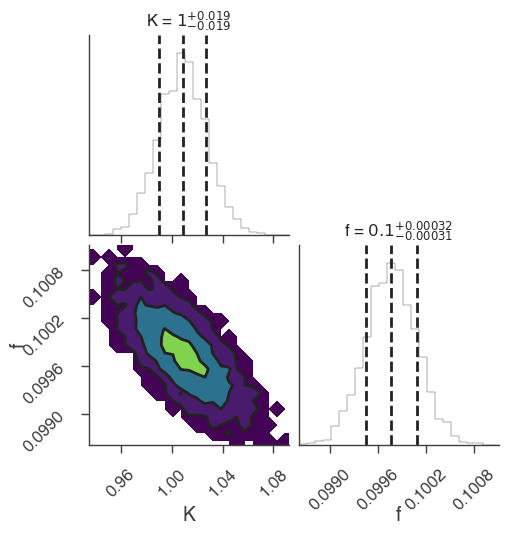

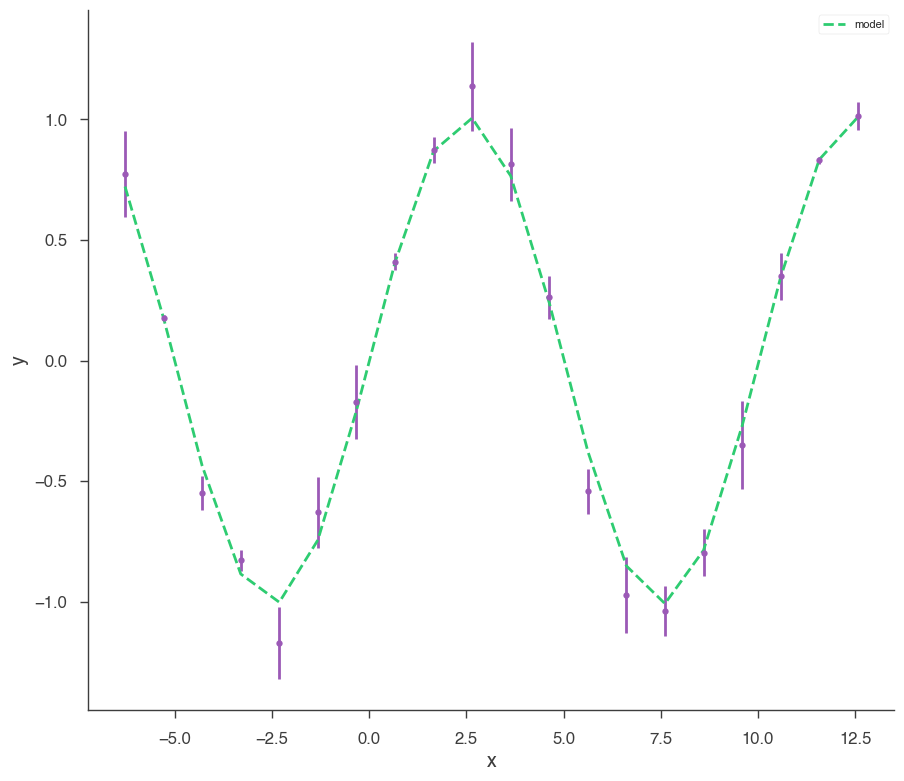

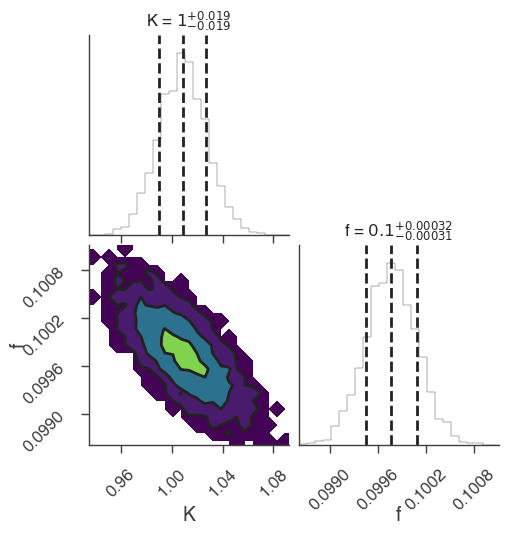

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=381615;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=19199;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:12, 48.02it/s]

Sampling progress :   2%|▏         | 11/625 [00:00<00:12, 49.86it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:10, 55.93it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:10, 59.27it/s]

Sampling progress :   5%|▌         | 32/625 [00:00<00:09, 62.08it/s]

Sampling progress :   6%|▋         | 40/625 [00:00<00:08, 67.49it/s]

Sampling progress :   8%|▊         | 49/625 [00:00<00:08, 71.38it/s]

Sampling progress :   9%|▉         | 57/625 [00:00<00:07, 73.03it/s]

Sampling progress :  10%|█         | 65/625 [00:00<00:07, 74.57it/s]

Sampling progress :  12%|█▏        | 73/625 [00:01<00:07, 73.92it/s]

Sampling progress :  13%|█▎        | 81/625 [00:01<00:07, 71.69it/s]

Sampling progress :  14%|█▍        | 89/625 [00:01<00:07, 69.72it/s]

Sampling progress :  15%|█▌        | 96/625 [00:01<00:07, 66.34it/s]

Sampling progress :  17%|█▋        | 104/625 [00:01<00:07, 69.64it/s]

Sampling progress :  18%|█▊        | 112/625 [00:01<00:07, 70.92it/s]

Sampling progress :  19%|█▉        | 120/625 [00:01<00:06, 72.20it/s]

Sampling progress :  20%|██        | 128/625 [00:01<00:06, 72.15it/s]

Sampling progress :  22%|██▏       | 136/625 [00:01<00:06, 73.48it/s]

Sampling progress :  23%|██▎       | 144/625 [00:02<00:06, 73.41it/s]

Sampling progress :  24%|██▍       | 152/625 [00:02<00:06, 74.72it/s]

Sampling progress :  26%|██▌       | 160/625 [00:02<00:06, 75.76it/s]

Sampling progress :  27%|██▋       | 169/625 [00:02<00:05, 78.83it/s]

Sampling progress :  28%|██▊       | 178/625 [00:02<00:05, 80.86it/s]

Sampling progress :  30%|██▉       | 187/625 [00:02<00:05, 79.45it/s]

Sampling progress :  31%|███       | 195/625 [00:02<00:05, 78.58it/s]

Sampling progress :  32%|███▏      | 203/625 [00:02<00:05, 76.71it/s]

Sampling progress :  34%|███▍      | 211/625 [00:02<00:05, 77.29it/s]

Sampling progress :  35%|███▌      | 219/625 [00:03<00:05, 77.21it/s]

Sampling progress :  36%|███▋      | 227/625 [00:03<00:05, 75.41it/s]

Sampling progress :  38%|███▊      | 235/625 [00:03<00:05, 72.92it/s]

Sampling progress :  39%|███▉      | 243/625 [00:03<00:05, 70.81it/s]

Sampling progress :  40%|████      | 252/625 [00:03<00:04, 74.69it/s]

Sampling progress :  42%|████▏     | 260/625 [00:03<00:04, 75.11it/s]

Sampling progress :  43%|████▎     | 268/625 [00:03<00:04, 75.03it/s]

Sampling progress :  44%|████▍     | 276/625 [00:03<00:04, 74.58it/s]

Sampling progress :  45%|████▌     | 284/625 [00:03<00:04, 72.44it/s]

Sampling progress :  47%|████▋     | 292/625 [00:04<00:04, 71.11it/s]

Sampling progress :  48%|████▊     | 300/625 [00:04<00:04, 71.76it/s]

Sampling progress :  49%|████▉     | 308/625 [00:04<00:04, 72.99it/s]

Sampling progress :  51%|█████     | 317/625 [00:04<00:04, 75.90it/s]

Sampling progress :  52%|█████▏    | 325/625 [00:04<00:03, 75.44it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:04<00:04, 71.76it/s]

Sampling progress :  55%|█████▍    | 341/625 [00:04<00:03, 73.23it/s]

Sampling progress :  56%|█████▌    | 349/625 [00:04<00:03, 71.53it/s]

Sampling progress :  57%|█████▋    | 357/625 [00:04<00:03, 70.97it/s]

Sampling progress :  58%|█████▊    | 365/625 [00:05<00:03, 69.54it/s]

Sampling progress :  60%|█████▉    | 373/625 [00:05<00:03, 71.77it/s]

Sampling progress :  61%|██████    | 382/625 [00:05<00:03, 74.49it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:05<00:03, 73.37it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:05<00:03, 73.92it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:05<00:02, 73.46it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:05<00:02, 74.19it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:05<00:02, 76.27it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:05<00:02, 75.58it/s]

Sampling progress :  70%|███████   | 439/625 [00:06<00:02, 76.20it/s]

Sampling progress :  72%|███████▏  | 447/625 [00:06<00:02, 75.56it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:06<00:02, 76.43it/s]

Sampling progress :  74%|███████▍  | 463/625 [00:06<00:02, 75.65it/s]

Sampling progress :  76%|███████▌  | 472/625 [00:06<00:01, 79.18it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:06<00:01, 82.82it/s]

Sampling progress :  79%|███████▊  | 491/625 [00:06<00:01, 76.85it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:06<00:01, 76.74it/s]

Sampling progress :  81%|████████  | 507/625 [00:06<00:01, 74.52it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:07<00:01, 71.79it/s]

Sampling progress :  84%|████████▎ | 523/625 [00:07<00:01, 73.01it/s]

Sampling progress :  85%|████████▍ | 531/625 [00:07<00:01, 73.80it/s]

Sampling progress :  86%|████████▌ | 539/625 [00:07<00:01, 73.55it/s]

Sampling progress :  88%|████████▊ | 547/625 [00:07<00:01, 74.52it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:07<00:00, 72.47it/s]

Sampling progress :  90%|█████████ | 563/625 [00:07<00:00, 69.74it/s]

Sampling progress :  91%|█████████▏| 571/625 [00:07<00:00, 68.73it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:07<00:00, 68.26it/s]

Sampling progress :  94%|█████████▍| 586/625 [00:08<00:00, 70.55it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:08<00:00, 74.88it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:08<00:00, 75.84it/s]

Sampling progress :  98%|█████████▊| 612/625 [00:08<00:00, 77.95it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:08<00:00, 76.13it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 73.21it/s]

23:06:34 INFO      fit restored to maximum of posterior                                         ]8;id=526475;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=838384;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=421864;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=518757;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 51


Scale Factor: 1.643227


Mean Integrated Autocorrelation Time: 3.27


Effective Sample Size: 3825.08


Number of Log Probability Evaluations: 64831


Effective Samples per Log Probability Evaluation: 0.059001


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.010 -0.020 +0.018,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.974 -0.029 +0.035) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.522774
total,-5.522774


Values of statistical measures:

,statistical measures
AIC,15.751430
BIC,17.037012
DIC,14.989943
PDIC,1.970282


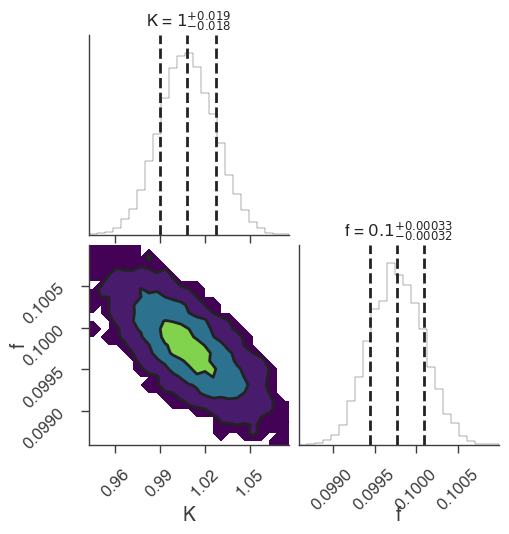

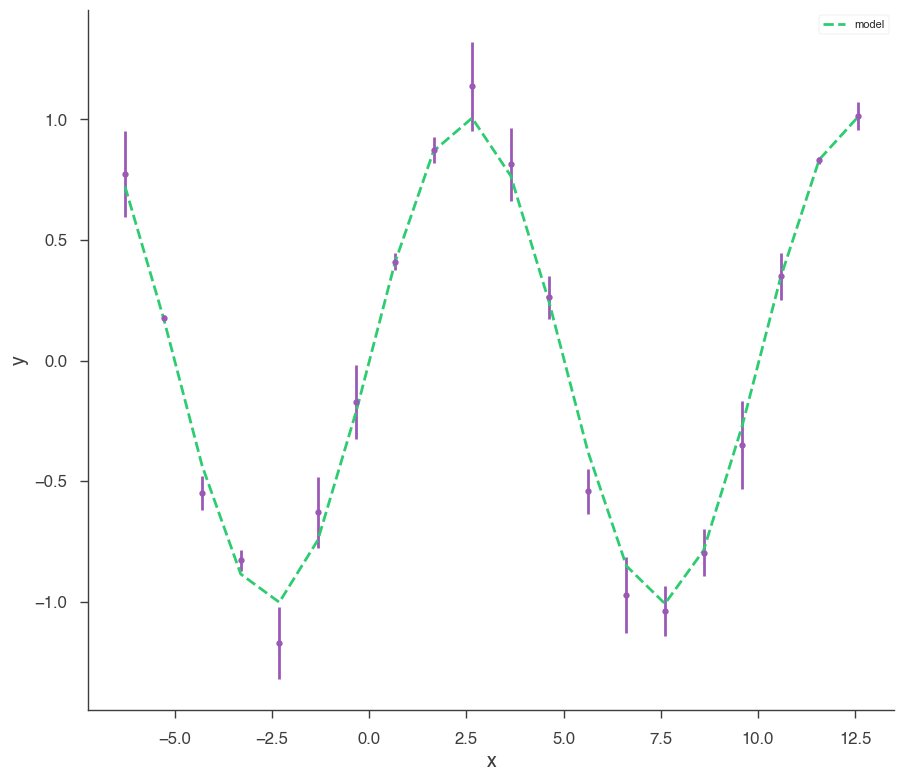

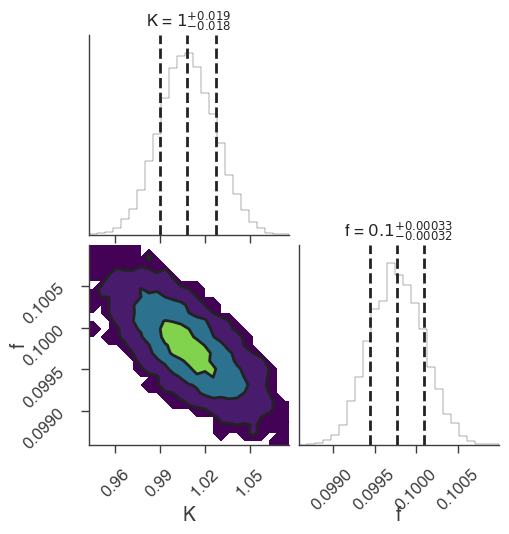

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

23:06:35 INFO      sampler set to ultranest                                                ]8;id=673676;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=365525;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6  


[ultranest] Likelihood function evaluations: 11882


[ultranest]   logZ = -15.15 +- 0.1109


[ultranest] Effective samples strategy satisfied (ESS = 987.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


23:06:43 INFO      fit restored to maximum of posterior                                         ]8;id=526129;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=223299;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=919025;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=340910;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 -0.019 +0.021,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.975 -0.031 +0.032) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.522832
total,-5.522832


Values of statistical measures:

,statistical measures
AIC,15.751546
BIC,17.037128
DIC,15.184875
PDIC,2.068842
log(Z),-6.588253


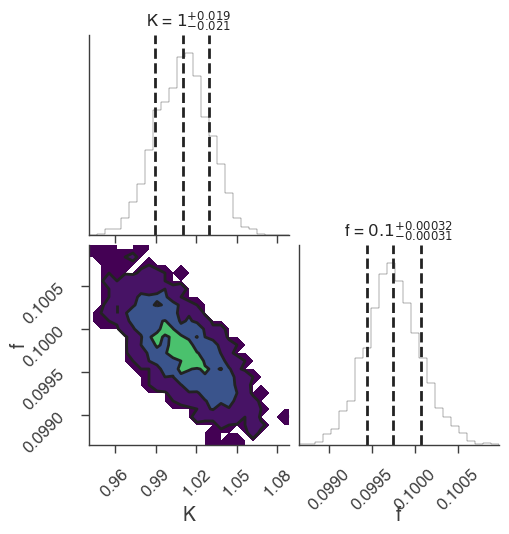

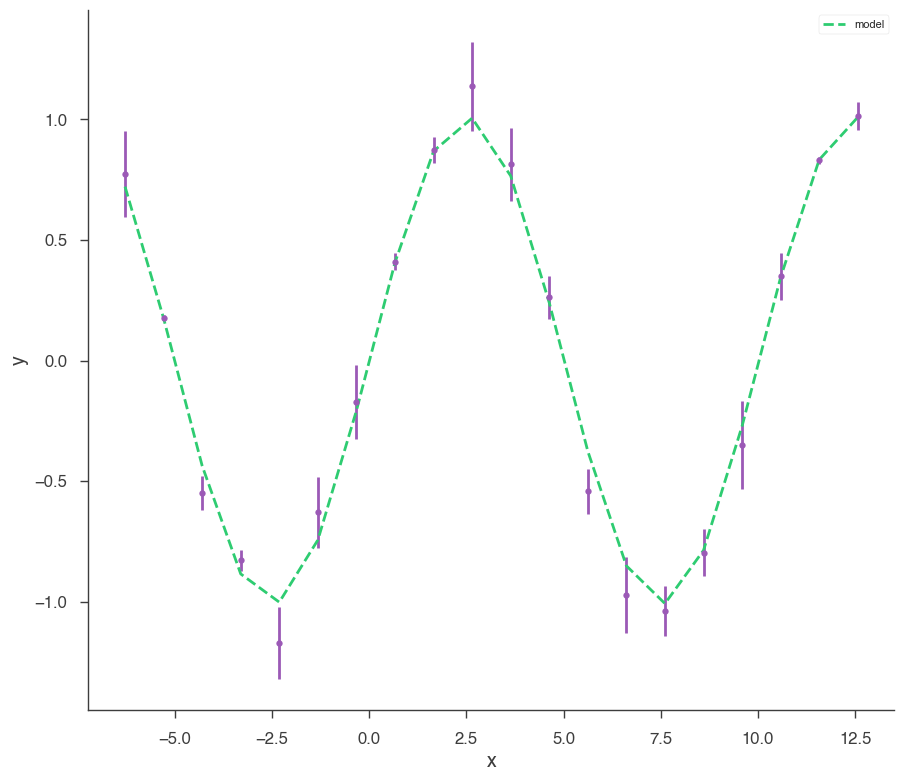

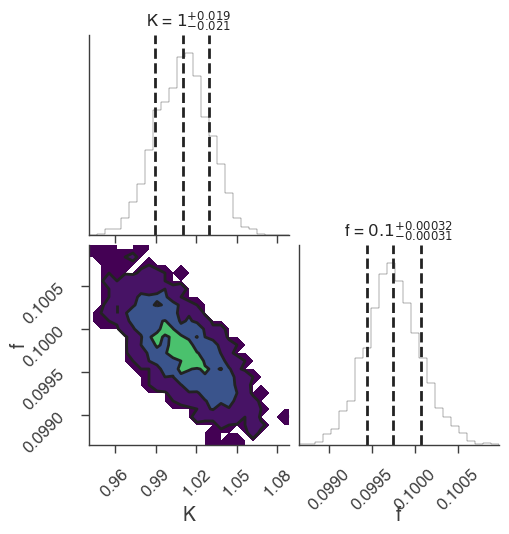

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()